In [9]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
drive_path = '/content/drive/MyDrive/solvermind'

Loading Data From Drive and Split the X and Y column, to Seperate the Traget for from Data

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
# Loading Data From Drive and Split the X and Y column, to Seperate the Traget for from Data
data = pd.read_csv("/content/drive/MyDrive/Solver_mind/Input Data.csv")
X = data[['X']].to_numpy()
Y = data[['Y']].to_numpy()

In [10]:
# Finding the Correlation between X and Target
data.corr()

,X,Y
X,1.000000,0.998399
Y,0.998399,1.000000


In [11]:
data.head() # Viweing Sampleset

,X,Y
0,12261.2,782.200000
1,12271.2,782.414455
2,12281.2,782.628910
3,12291.2,782.843364
4,12301.2,783.057819


In [12]:
import matplotlib.pyplot as plt

Plot X and Y Corresponding

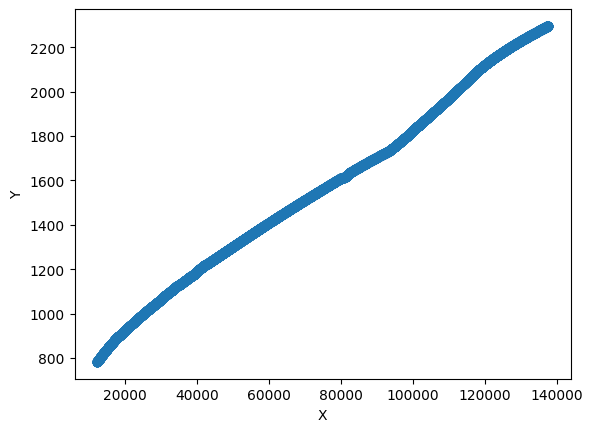

In [13]:
plt.scatter(X, Y)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

QQ Plot

Its Used to Identify the distribution.

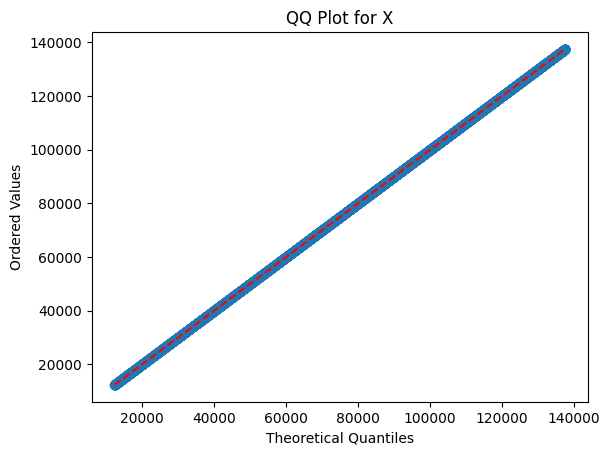

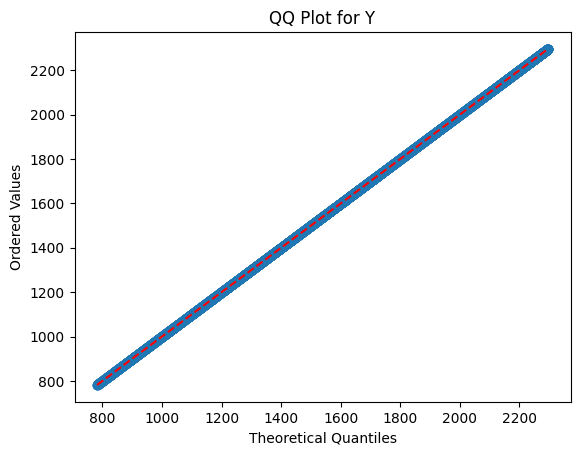

In [19]:
# Since the distribution is lied on the diagnal line, so its represented the data distributed normally. To confirm that I have ploted
# Ploted the Normal distribution curve.
data = pd.DataFrame({'X': list(X),
                     'Y': list(Y)})

# Sort the values for X and Y
sorted_X = np.sort(data['X'])
sorted_Y = np.sort(data['Y'])

# Calculate the quantiles
percentiles_X = np.linspace(0, 100, len(sorted_X))
percentiles_Y = np.linspace(0, 100, len(sorted_Y))

# Plot the QQ plot for X
plt.scatter(np.percentile(sorted_X, percentiles_X), sorted_X, alpha=0.5)
plt.plot([np.min(sorted_X), np.max(sorted_X)], [np.min(sorted_X), np.max(sorted_X)], color='red', linestyle='--')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values')
plt.title('QQ Plot for X')
plt.show()

# Plot the QQ plot for Y
plt.scatter(np.percentile(sorted_Y, percentiles_Y), sorted_Y, alpha=0.5)
plt.plot([np.min(sorted_Y), np.max(sorted_Y)], [np.min(sorted_Y), np.max(sorted_Y)], color='red', linestyle='--')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values')
plt.title('QQ Plot for Y')
plt.show()

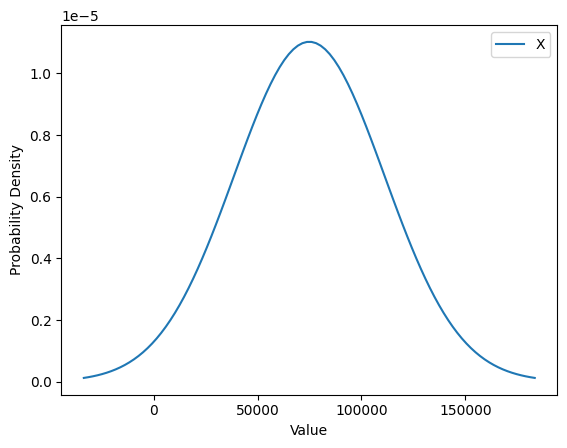

In [15]:
#### Notmal Distributuon Confirmation

# Create a DataFrame with column X
data = pd.DataFrame({'X': list(X)})

# Plot the normal distribution curve for column X
mu_X = np.mean(data['X'])
sigma_X = np.std(data['X'])
x_values_X = np.linspace(mu_X - 3*sigma_X, mu_X + 3*sigma_X, 100)
y_values_X = (1/(sigma_X * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x_values_X - mu_X) / sigma_X)**2)

plt.plot(x_values_X, y_values_X, label='X')

# Set the plot labels and legend
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()

# Show the plot
plt.show()


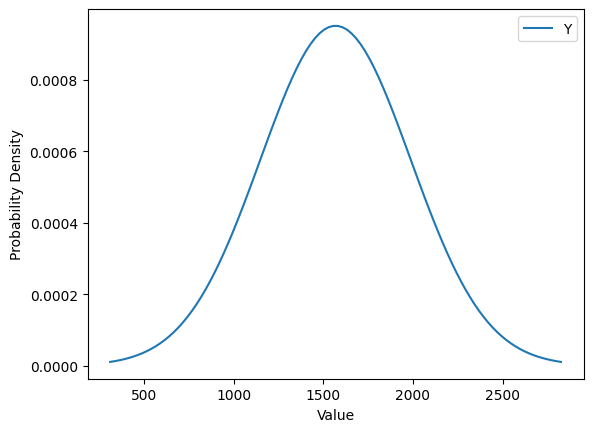

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame with column Y
data = pd.DataFrame({'Y': list(Y)})

# Plot the normal distribution curve for column Y
mu_Y = np.mean(data['Y'])
sigma_Y = np.std(data['Y'])
x_values_Y = np.linspace(mu_Y - 3*sigma_Y, mu_Y + 3*sigma_Y, 100)
y_values_Y = (1/(sigma_Y * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x_values_Y - mu_Y) / sigma_Y)**2)

plt.plot(x_values_Y, y_values_Y, label='Y')

# Set the plot labels and legend
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()

# Show the plot
plt.show()


In [4]:
data

,X,Y
0,12261.2,782.200000
1,12271.2,782.414455
2,12281.2,782.628910
3,12291.2,782.843364
4,12301.2,783.057819
...,...,...
12592,137535.0,2295.533700
12593,137545.0,2295.618689
12594,137555.0,2295.703677
12595,137565.0,2295.788665


**Buildng the NN model with RELU Activation**

In [12]:
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

# Load the dataset
X = data['X']
Y = data['Y']

# Normalize the data between -1 and 1
X_scaled = (X - np.mean(X)) / (np.max(X) - np.min(X))
Y_scaled = (Y - np.mean(Y)) / (np.max(Y) - np.min(Y))

# Split the data into training and testing sets 90% data as training
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y_scaled, test_size=0.1, random_state=42)


# Model Building
def create_model(neurons=64):
    model = Sequential()
    model.add(Dense(neurons, activation='relu', input_shape=(1,)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Create a KerasRegressor based on the create_model function
model = KerasRegressor(build_fn=create_model)




# Train the model
model.fit(X_train, Y_train, epochs=10000, verbose=0)

# Make predictions on the test data
Y_pred_scaled = model.predict(X_test)
Y_pred = Y_pred_scaled * (np.max(Y) - np.min(Y)) + np.mean(Y)

# Calculate the error
Y_test_ = Y_test * (np.max(Y) - np.min(Y)) + np.mean(Y)  # Scaling Y test

error = Y_pred - Y_test_.to_numpy() #Y_test
is_within_range = np.logical_and(error >= -0.1, error <= 0.1)

# Print the predictions and error
print("Predicted Y:", Y_pred)
print("Actual Y:", Y_test_)
print("Error:", error)
print("Error within range:", is_within_range)


<ipython-input-12-41924d43e2ab>:29: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=create_model)


40/40 [==============================] - 0s 1ms/step
Predicted Y: [1673.2645   933.0237  1228.454   ... 1190.4186  1781.0172   878.44214]
Actual Y: 7472     1672.858756
850       933.863178
3126     1228.447982
11638    2209.318713
4367     1362.571257
            ...     
10771    2111.757166
3101     1225.958856
2802     1190.506545
8528     1780.855407
484       878.538146
Name: Y, Length: 1260, dtype: float64
Error: [ 0.40577074 -0.83949641  0.00599743 ... -0.08796615  0.16180458
 -0.09600688]
Error within range: [False False  True ...  True False  True]


In [ ]:
# Satanderding the error
error_norm = (error - np.mean(error)) / (np.max(error) - np.min(error))

In [ ]:
flattened_numbers = error_norm.flatten()

(array([ 19.,  69.,  83., 369., 276., 248., 158.,  26.,  11.,   1.]),
 array([-0.44121134, -0.34121134, -0.24121134, -0.14121134, -0.04121134,
         0.05878866,  0.15878866,  0.25878866,  0.35878866,  0.45878866,
         0.55878866]),
 <BarContainer object of 10 artists>)

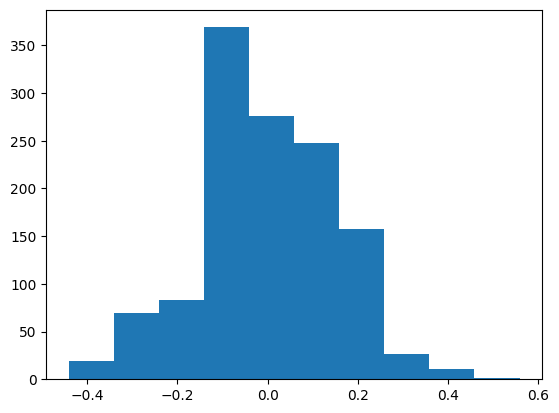

In [ ]:
plt.hist(error_norm)
# Ploting the graph to find the error range

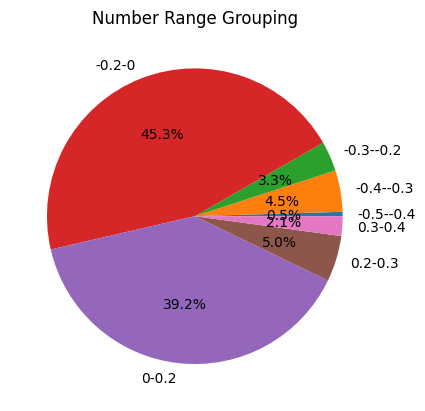

In [ ]:

# Error ranges for grouping
group_ranges = [-0.5,-0.4,-0.3,-0.2,0,0.2,0.3,0.4]

# Group the numbers based on the ranges
grouped_counts, _ = np.histogram(flattened_numbers, bins=group_ranges)

# Create the labels for the pie chart based on the number ranges
group_labels = [f"{group_ranges[i]}-{group_ranges[i+1]}" for i in range(len(group_ranges)-1)]

# Create a pie chart
plt.pie(grouped_counts, labels=group_labels, autopct='%1.1f%%')

# Add a title to the chart
plt.title('Number Range Grouping')

# Display the chart
plt.show()

**Adding HyperParameter**

In [ ]:
# Define the hyperparameters to tune
from sklearn.model_selection import GridSearchCV
param_grid = {
    'neurons': [32, 64, 128],
    'batch_size': [8, 16, 32]
    }

# Create the GridSearchCV object
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)

# Perform the grid search
grid_result = grid.fit(X_train, Y_train)

1418/1418 [==============================] - 4s 2ms/step - loss: 0.0013


**Best Parameter : Best number of neurans for best model**

In [ ]:
print("Best Hyperparameters: ", grid_result.best_params_)

Best Hyperparameters:  {'batch_size': 8, 'neurons': 128}


In [ ]:
best_model = grid_result.best_estimator_

In [ ]:
new_ypred = best_model.predict(X_test)
scalled_new_ypred = new_ypred * (np.max(Y) - np.min(Y)) + np.mean(Y)

# Calculate the error
Y_test__ = Y_test * (np.max(Y) - np.min(Y)) + np.mean(Y)  # Scaling Y test

new_error = scalled_new_ypred - Y_test__.to_numpy() #Y_test
is_within_range_new = np.logical_and(new_error >= -0.1, error <= 0.1)

158/158 [==============================] - 0s 2ms/step


In [ ]:
error_norm_new = (new_error - np.mean(new_error)) / (np.max(new_error) - np.min(new_error))

In [ ]:
flattened_numbers = error_norm_new.flatten()

In [ ]:
flattened_numbers

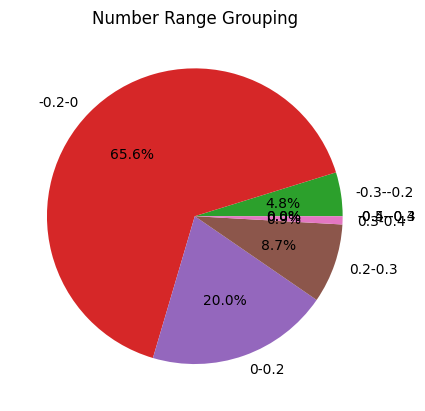

In [ ]:

# Error ranges for grouping
group_ranges = [-0.5,-0.4,-0.3,-0.2,0,0.2,0.3,0.4]

# Group the numbers based on the ranges
grouped_counts, _ = np.histogram(flattened_numbers, bins=group_ranges)

# Create the labels for the pie chart based on the number ranges
group_labels = [f"{group_ranges[i]}-{group_ranges[i+1]}" for i in range(len(group_ranges)-1)]

# Create a pie chart
plt.pie(grouped_counts, labels=group_labels, autopct='%1.1f%%')

# Add a title to the chart
plt.title('Number Range Grouping')

# Display the chart
plt.show()

**Showing the Model Weight and Biases of the best model**

In [ ]:
## Finding weight

k_old_model = model.model
k_old_model_weights = k_old_model.get_weights()

for layer_idx in range(len(k_old_model_weights)//2):
    print(f"Layer {layer_idx+1} weights: ")
    print(k_old_model_weights[layer_idx*2])
    print(f"Layer {layer_idx+1} biases: ")
    print(k_old_model_weights[layer_idx*2+1])

Layer 1 weights: 
[[ 0.71786857 -0.14523731  0.12478894 -0.02551558  0.42023575  0.19315785
  -0.19790113  0.00724449 -0.14773019 -0.06490128 -0.19407642 -0.17209445
  -0.22251336  0.13971534 -0.34864247  0.20228046  0.16095923 -0.23509452
  -0.20238687 -0.00208584 -0.14701335  0.44288334 -0.38984782  0.14825597
  -0.11365128  0.3928046  -0.14064178 -0.11602513  0.0339217   0.31708905
  -0.2030557  -0.24312298 -0.41396108  0.1787956   0.09680848  0.13274404
  -0.7199423  -0.21508016  0.08859455 -0.21077456 -0.03796183 -0.00245398
   0.00333825 -0.23576318  0.08213039  0.02956565 -0.24720164 -0.05533045
  -0.14253756 -0.15586375  0.01310678 -0.08895843 -0.17685866 -0.09239926
  -0.12456992 -0.54050714 -0.26047164 -0.13853647  0.10865003  0.19773443
   0.08809698 -0.22966525  0.08115102 -0.0281349 ]]
Layer 1 biases: 
[-0.14033172 -0.07269859  0.06244568 -0.02311451 -0.06549115  0.09662172
  0.07059624 -0.01645119  0.06699006 -0.03574674  0.06923385  0.06137709
  0.03419968  0.06995628 -0

In [ ]:
## Finding weight for Hyper Parameter Tuned Model

k_new_model = best_model.model
k_new_model_weights = k_new_model.get_weights()

for layer_idx in range(len(k_new_model_weights)//2):
    print(f"Layer {layer_idx+1} weights: ")
    print(k_new_model_weights[layer_idx*2])
    print(f"Layer {layer_idx+1} biases: ")
    print(k_new_model_weights[layer_idx*2+1])

Layer 1 weights: 
[[ 0.079873    0.0230909   0.14495337 -0.10155249  0.08967961 -0.01670005
   0.00401356  0.00526893  0.00589745 -0.04784185  0.01344209  0.17044814
  -0.0047452  -0.16566299 -0.08725267  0.2254822   0.2129467  -0.08226173
   0.08268203 -0.10448719 -0.10244896  0.1157138  -0.09308384  0.15141414
   0.26483232 -0.13351493  0.00579403  0.15569769  0.08104065 -0.00560906
  -0.08762828 -0.19233604  0.06637394  0.05964389  0.09721071 -0.17547148
  -0.20469077 -0.06527808 -0.21378736  0.10002955  0.08288557 -0.09896915
   0.13641419 -0.06816715  0.18123542  0.0543236  -0.36929855 -0.12552327
   0.25175285  0.06961207 -0.05641723  0.01432424  0.07064049 -0.09500794
  -0.07273321 -0.36463538 -0.14613396  0.02195317 -0.13145311  0.12346069
  -0.09335212 -0.03307697  0.10933843 -0.13881765  0.01182962  0.0496074
  -0.10341519  0.19342622 -0.2347397  -0.13531643  0.00372791 -0.08941983
  -0.15513061 -0.18771933  0.10297485 -0.02758847 -0.14204784  0.0863156
  -0.07208315 -0.12365